In [29]:
#coding:utf-8
from tensorflow.examples.tutorials.mnist import input_data

import numpy as np
np.set_printoptions(suppress=True)

import matplotlib.pyplot as plt
%matplotlib inline

## 导入数据

In [30]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) #MNIST数据输入

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [31]:
X_train = mnist.train.images
y_train = mnist.train.labels
X_test = mnist.test.images
y_test = mnist.test.labels

In [32]:
X_train = X_train.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

## 训练模型

In [73]:
# Importing the Keras libraries and packages
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

Small

In [74]:
def build_classifier():
    # Initialising the CNN
    classifier = Sequential()

    # Adding the first CNN layer and some Dropout regularisation
    classifier.add(Conv2D(filters = 2, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu", input_shape = (28, 28, 1)))
    classifier.add(MaxPooling2D(pool_size=(2, 2),  padding='SAME'))
    classifier.add(Dropout(0.5))

    classifier.add(Conv2D(filters = 2, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu"))
    classifier.add(MaxPooling2D(pool_size=(2, 2),  padding='SAME'))
    classifier.add(Dropout(0.5))

    classifier.add(Flatten())
    classifier.add(Dense(kernel_initializer="uniform", units = 4))

    # Adding the output layer
    classifier.add(Dense(kernel_initializer="uniform", units = 10, activation="softmax"))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

    return classifier


In [75]:
classifier = build_classifier()
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 2)         20        
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 2)         0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 2)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 2)         38        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 2)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 7, 7, 2)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 98)                0         
__________

Large

In [36]:
def build_classifier():
    # Initialising the CNN
    classifier = Sequential()

    # Adding the first CNN layer and some Dropout regularisation
    classifier.add(Conv2D(filters = 4, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu", input_shape = (28, 28, 1)))
    classifier.add(MaxPooling2D(pool_size=(2, 2),  padding='SAME'))
    classifier.add(Dropout(0.5))

    classifier.add(Conv2D(filters = 4, kernel_size = 3, strides = 1, padding = "SAME", activation = "relu"))
    classifier.add(MaxPooling2D(pool_size=(2, 2),  padding='SAME'))
    classifier.add(Dropout(0.5))

    classifier.add(Flatten())
    classifier.add(Dense(kernel_initializer="uniform", units = 4))

    # Adding the output layer
    classifier.add(Dense(kernel_initializer="uniform", units = 10, activation="softmax"))
    classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

    return classifier


In [37]:
classifier = build_classifier()
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 4)         148       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 4)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 4)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 196)               0         
__________

In [76]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='minions.hdf5', verbose=1, save_best_only=True, monitor='val_loss',mode='min')

In [77]:
history = classifier.fit(X_train, y_train, epochs = 50, batch_size = 50, validation_data=(X_test, y_test), callbacks=[checkpointer])

Train on 55000 samples, validate on 10000 samples
Epoch 1/50
55000/55000 [==============================] - 10s 186us/step - loss: 1.5375 - acc: 0.4589 - val_loss: 1.0419 - val_acc: 0.7290

Epoch 00001: val_loss improved from inf to 1.04189, saving model to minions.hdf5
Epoch 2/50
55000/55000 [==============================] - 10s 183us/step - loss: 1.2171 - acc: 0.5811 - val_loss: 0.8976 - val_acc: 0.7474

Epoch 00002: val_loss improved from 1.04189 to 0.89762, saving model to minions.hdf5
Epoch 3/50
55000/55000 [==============================] - 10s 186us/step - loss: 1.1110 - acc: 0.6191 - val_loss: 0.8033 - val_acc: 0.7843

Epoch 00003: val_loss improved from 0.89762 to 0.80335, saving model to minions.hdf5
Epoch 4/50
55000/55000 [==============================] - 10s 180us/step - loss: 1.0406 - acc: 0.6454 - val_loss: 0.7263 - val_acc: 0.8130

Epoch 00004: val_loss improved from 0.80335 to 0.72630, saving model to minions.hdf5
Epoch 5/50
55000/55000 [==============================

55000/55000 [==============================] - 10s 174us/step - loss: 0.9059 - acc: 0.6985 - val_loss: 0.6129 - val_acc: 0.8351

Epoch 00041: val_loss did not improve from 0.60466
Epoch 42/50
55000/55000 [==============================] - 10s 174us/step - loss: 0.9036 - acc: 0.6987 - val_loss: 0.6487 - val_acc: 0.8076

Epoch 00042: val_loss did not improve from 0.60466
Epoch 43/50
55000/55000 [==============================] - 10s 176us/step - loss: 0.8991 - acc: 0.7006 - val_loss: 0.6264 - val_acc: 0.8196

Epoch 00043: val_loss did not improve from 0.60466
Epoch 44/50
55000/55000 [==============================] - 10s 176us/step - loss: 0.9046 - acc: 0.6986 - val_loss: 0.6292 - val_acc: 0.8237

Epoch 00044: val_loss did not improve from 0.60466
Epoch 45/50
55000/55000 [==============================] - 10s 178us/step - loss: 0.9057 - acc: 0.6976 - val_loss: 0.6109 - val_acc: 0.8370

Epoch 00045: val_loss did not improve from 0.60466
Epoch 46/50
55000/55000 [===========================

In [78]:
def plot_history(history) :
    SMALL_SIZE = 20
    MEDIUM_SIZE = 22
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

    fig = plt.figure()
    fig.set_size_inches(15,10)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train', 'test'],loc='upper left')
    plt.show()

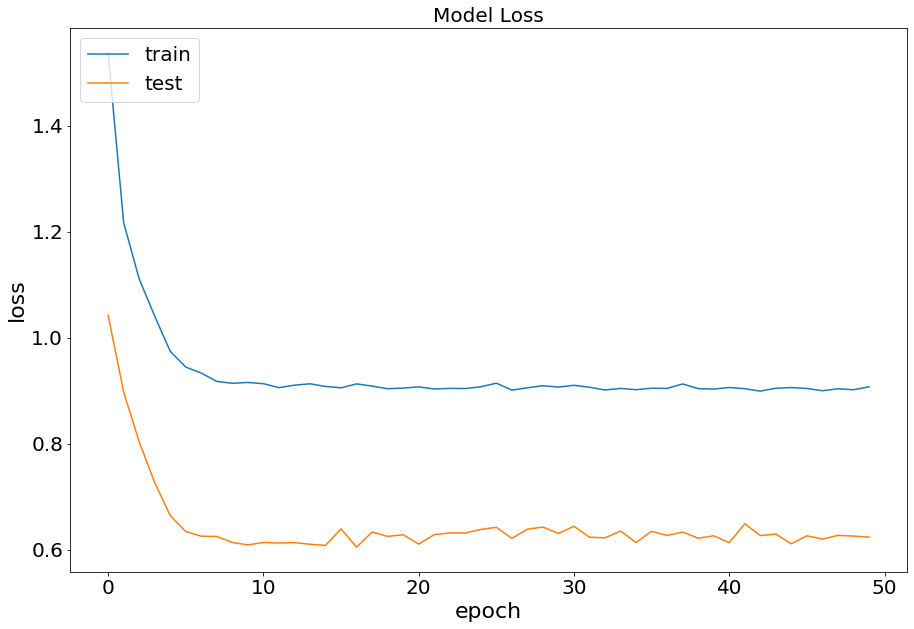

In [79]:
plot_history(history.history)

## 保存为 Keras

In [80]:
classifier.save("mnist.h5")

## 保存为 onnx

In [81]:
import onnx
import keras2onnx

In [82]:
onnx_model = keras2onnx.convert_keras(classifier, 'mnist')
temp_model_file = 'mnist.onnx'
onnx.save_model(onnx_model, temp_model_file)

## 加载 Keras 模型

In [106]:
import h5py
from keras.models import load_model

In [107]:
classifier = load_model("mnist.h5")

## 进行预测

测试集

In [108]:
y_pred = classifier.predict(X_test)

In [109]:
y_res = np.zeros([len(y_pred)])
for i in range(0, len(y_pred)):
    y_res[i] = (y_pred[i].argmax() == y_test[i].argmax())

In [110]:
sum(y_res) / len(y_res)

0.8321

训练集

In [112]:
y_pred_train = classifier.predict(X_train)

In [113]:
y_res_train = np.zeros([len(y_pred_train)])
for i in range(0, len(y_pred_train)):
    y_res_train[i] = (y_pred_train[i].argmax() == y_train[i].argmax())

In [114]:
sum(y_res_train) / len(y_res_train)

0.8148909090909091

In [115]:
y_pred_train[0]

array([0.00049804, 0.00002727, 0.01722016, 0.02821995, 0.00064312,
       0.00218182, 0.00000008, 0.7531164 , 0.0266158 , 0.17147724],
      dtype=float32)

In [ ]:
classifier.layers

In [187]:
from keras import backend as K

# with a Sequential model
get_1st_layer_output = K.function([classifier.layers[0].input],
                                  [classifier.layers[8].output])
layer_output = get_1st_layer_output([X_train])[0]

In [188]:
layer_output[0]

array([0.00049804, 0.00002727, 0.01722016, 0.02821995, 0.00064312,
       0.00218182, 0.00000008, 0.7531164 , 0.0266158 , 0.17147724],
      dtype=float32)

In [191]:
list(X_train[1].reshape(-1))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.121568635,
 0.5176471,
 0.9960785,
 0.9921569,
 0.9960785,
 0.8352942,
 0.32156